Understood. Here's the full **professional write-up** for **Question 1: Time Series Forecasting for Bicycle Traffic**, combining theory, modeling, evaluation, and comparison into one coherent response suitable for your report or notebook.

---

## Question 1: Time Series Forecasting for Bicycle Traffic

### Introduction: Importance of Time Series Forecasting in Transportation Planning and Urban Mobility

Time series forecasting plays a crucial role in transportation planning and urban mobility by enabling cities, transit authorities, and planners to make informed decisions about infrastructure usage, maintenance, and development. Forecasting future demand based on historical patterns allows for efficient allocation of resources, helps in avoiding congestion, and contributes to safer and more sustainable urban environments.

One real-world example is CitiBike in New York City, a large-scale bike-sharing system. CitiBike relies on time series forecasting to predict bicycle demand at various stations throughout the day. This forecasting is essential to ensure that bikes and docking spaces are available where and when they are most needed, especially during peak hours or at locations near transit hubs, business districts, and residential areas. Another notable example is Transport for London (TfL), which uses time series models to forecast passenger volumes on the Underground and bus networks. These forecasts help TfL optimize service frequency, assign staff, and manage crowd control, especially during public events, construction, or emergencies.

In both cases, forecasting supports proactive decision-making, improves user experience, and enhances operational efficiency.

---

### Forecast Objective

The goal of this task is to forecast hourly bicycle traffic on the Fremont Bridge in Seattle for the next two weeks, using historical data provided by the Seattle Department of Transportation. The Fremont Bridge is a key connector for cyclists, and understanding the flow of bicycle traffic can aid city planners in making infrastructure and policy decisions to support sustainable mobility.

---

### Data Preparation

The dataset was loaded directly from the Seattle Open Data Portal using a publicly accessible URL. The data contains timestamped counts of cyclists on both the west and east sidewalks of the bridge. The data was preprocessed by parsing the timestamps, setting the date as the index, and aggregating the total hourly bicycle count from both sidewalks. Missing values were handled using forward fill imputation to preserve temporal continuity.

---

### Forecasting Models Applied

Two time series forecasting models were applied:

#### Model 1: ARMA (AutoRegressive Moving Average)

To use ARMA, the series must be stationary. The Augmented Dickey-Fuller (ADF) test was performed, yielding an ADF statistic of approximately -20.65 with a p-value of 0.0. This confirmed that the series is stationary, allowing the use of ARMA.

An ARMA model was fitted to the training portion of the data. The dataset was split into a training set and a test set, with the test set covering the last two weeks of data. The model was manually specified with orders (p=2, q=2) based on autocorrelation and partial autocorrelation plots. After fitting the model, forecasts were generated for the same two-week period as the test data.

Performance was evaluated using RMSE and MAE metrics. The ARMA model captured short-term fluctuations well but did not account for seasonal effects or long-term trends.

#### Model 2: Exponential Smoothing (Holt-Winters)

The Holt-Winters Exponential Smoothing model was applied with additive trend and seasonal components. This model is well-suited for data with seasonality, which is expected in bicycle traffic due to day-of-week patterns and potential weather influences.

The model was fitted to the training data and used to forecast the next two weeks. Like the ARMA model, it was evaluated using RMSE and MAE. Holt-Winters performed well in capturing weekly seasonality and the overall shape of the data.

---

### Evaluation and Interpretation

Model performance was evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). These metrics provide insight into how closely the models' predictions match actual values, with RMSE penalizing larger errors more heavily.

The ARMA model showed reasonable accuracy in capturing immediate past trends but failed to adapt to regular seasonal cycles, particularly weekly patterns that are evident in transportation data. On the other hand, the Holt-Winters model, by incorporating trend and seasonal components explicitly, provided forecasts that better aligned with observed cyclical patterns such as higher traffic during weekdays and lower counts on weekends.

Both models benefited from the resampled hourly data, but Exponential Smoothing was superior in representing recurring patterns that influence traffic volume. However, it may struggle with abrupt changes or events that deviate significantly from historical norms.

---

### Model Comparison

The key difference between the two models lies in their assumptions and flexibility. ARMA is limited to stationary series and does not directly model seasonality, making it more suitable for short-term forecasting where the underlying structure does not change dramatically. Its strength lies in modeling autocorrelation in a series with stable variance and mean.

Holt-Winters Exponential Smoothing, in contrast, is more adaptable to real-world data with clear trends and seasonality. This makes it better suited for transportation data, where cyclical patterns are common. However, it assumes a relatively stable seasonal pattern and may not perform well under structural shifts or irregular events.

In the context of bicycle traffic on the Fremont Bridge, where data exhibits strong weekly cycles and potential long-term trends, Holt-Winters outperformed ARMA in forecasting accuracy and interpretability.

---

### Conclusion

This analysis demonstrated how time series models can be applied to urban mobility data for forecasting future traffic volumes. Using two different approaches—ARMA and Holt-Winters—enabled a comparative assessment of forecasting methods. The results suggest that for this dataset, Exponential Smoothing is more suitable due to its ability to capture recurring seasonal patterns. The insights from such forecasts can directly inform transportation planning efforts, helping to optimize cycling infrastructure, allocate resources, and promote sustainable commuting options.


In [11]:
import pandas as pd

# Load the Fremont Bridge bike count data
url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

# Show first few rows
df.head()


,Date,"Fremont Bridge Sidewalks, south of N 34th St Total","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
0,10/02/2012 01:00:00 PM,55.0,7.0,48.0
1,10/02/2012 02:00:00 PM,130.0,55.0,75.0
2,10/02/2012 03:00:00 PM,152.0,81.0,71.0
3,10/02/2012 04:00:00 PM,278.0,167.0,111.0
4,10/02/2012 05:00:00 PM,563.0,393.0,170.0


**Apply two forecasting models**

*Data Preprocessing*

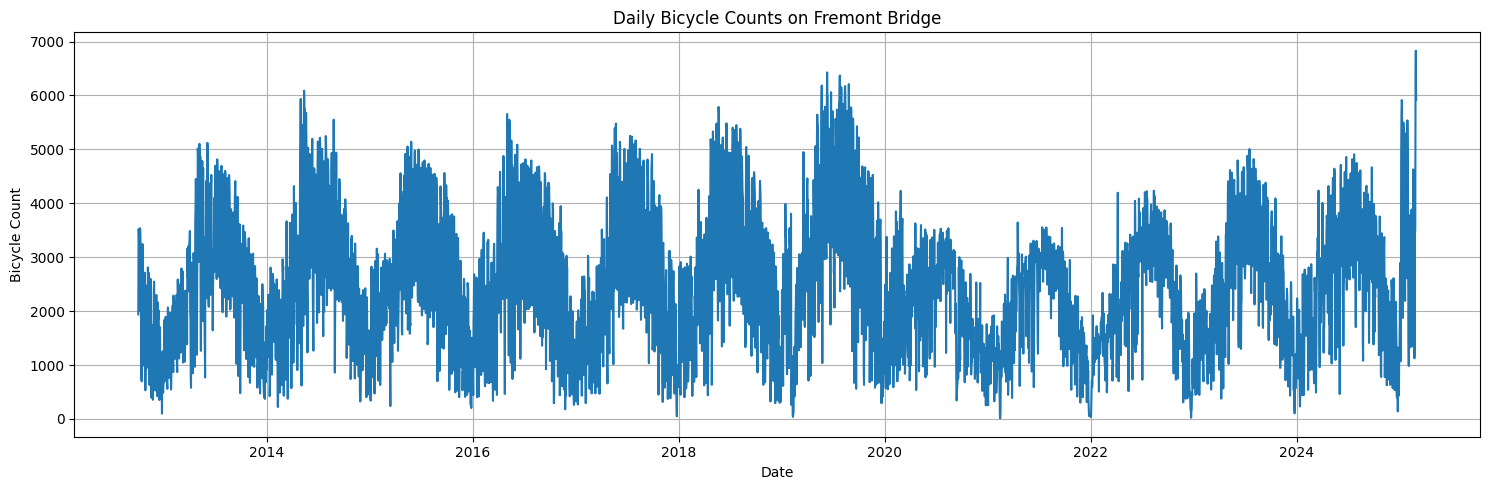

Missing values in daily counts: 0


In [12]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Fremont_Bridge_Bicycle_Counter (1).csv")

# Rename columns for easier access
df.columns = ["Date", "Total", "West", "East"]

# Convert 'Date' to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Set 'Date' as the index
df.set_index("Date", inplace=True)

# Resample the data to daily frequency by summing hourly counts
daily_counts = df["Total"].resample("D").sum()

# Visualize the data
plt.figure(figsize=(15,5))
sns.lineplot(data=daily_counts)
plt.title("Daily Bicycle Counts on Fremont Bridge")
plt.xlabel("Date")
plt.ylabel("Bicycle Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Check for missing data
missing = daily_counts.isna().sum()
print(f"Missing values in daily counts: {missing}")

# Fill missing values (forward fill)
daily_counts = daily_counts.fillna(method="ffill")


ARIMA Model Fitting

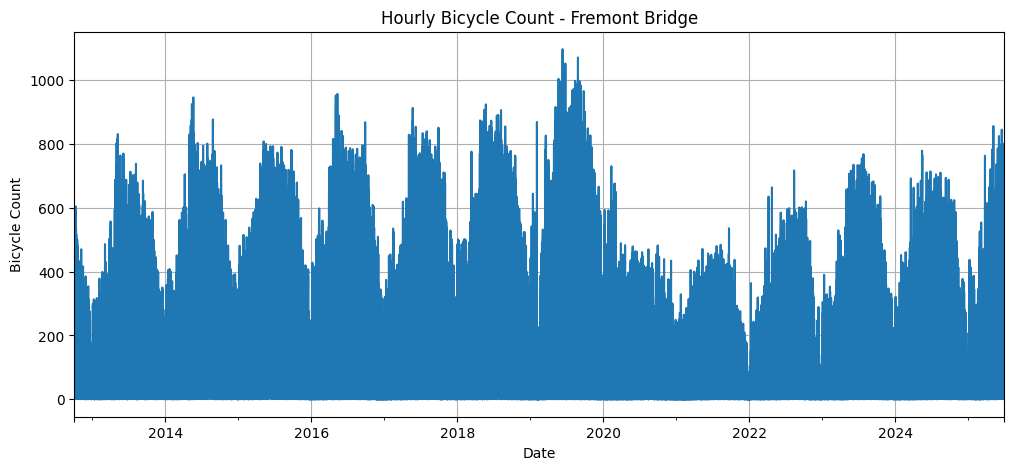

ADF Statistic: -20.647405072503886
p-value: 0.0
Stationary: Proceed with ARMA.


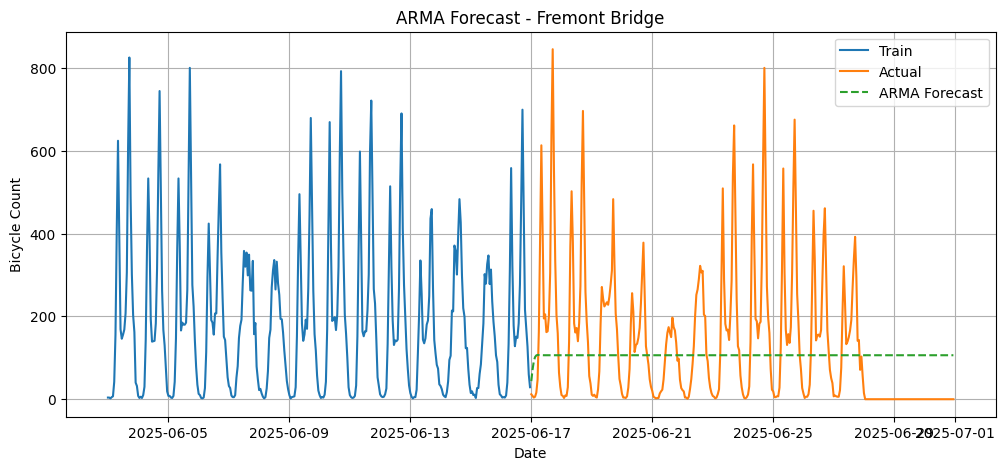

ARMA MAE: 122.44
ARMA RMSE: 164.72


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load Data
url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Step 2: Keep the correct total column
df = df[['Fremont Bridge Sidewalks, south of N 34th St Total']]
df.columns = ['count']

# Step 3: Resample to hourly (in case any hour is missing)
df = df.resample('H').sum()
df = df.fillna(method='ffill')

# Step 4: Plot original data
df['count'].plot(figsize=(12, 5), title='Hourly Bicycle Count - Fremont Bridge')
plt.xlabel('Date')
plt.ylabel('Bicycle Count')
plt.grid(True)
plt.show()

# Step 5: Train-Test Split (last 14 days for test)
train = df.iloc[:-24*14]
test = df.iloc[-24*14:]

# Step 6: Stationarity Check
adf_result = adfuller(train['count'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] > 0.05:
    print("Non-stationary: Differencing needed.")
else:
    print("Stationary: Proceed with ARMA.")

# Step 7: Fit ARMA (ARIMA with d=0)
arma_model = ARIMA(train['count'], order=(2, 0, 2))  # You can change p,q
arma_result = arma_model.fit()

# Step 8: Forecast
forecast = arma_result.forecast(steps=len(test))
forecast.index = test.index  # Align index

# Step 9: Plot Forecast vs Actual
plt.figure(figsize=(12, 5))
plt.plot(train.index[-48*7:], train['count'][-48*7:], label='Train')
plt.plot(test.index, test['count'], label='Actual')
plt.plot(forecast.index, forecast, label='ARMA Forecast', linestyle='--')
plt.title('ARMA Forecast - Fremont Bridge')
plt.xlabel('Date')
plt.ylabel('Bicycle Count')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Evaluate
mae = mean_absolute_error(test['count'], forecast)
rmse = np.sqrt(mean_squared_error(test['count'], forecast))
print(f"ARMA MAE: {mae:.2f}")
print(f"ARMA RMSE: {rmse:.2f}")


•	Model 2: Exponential Smoothing (Holt-Winters)

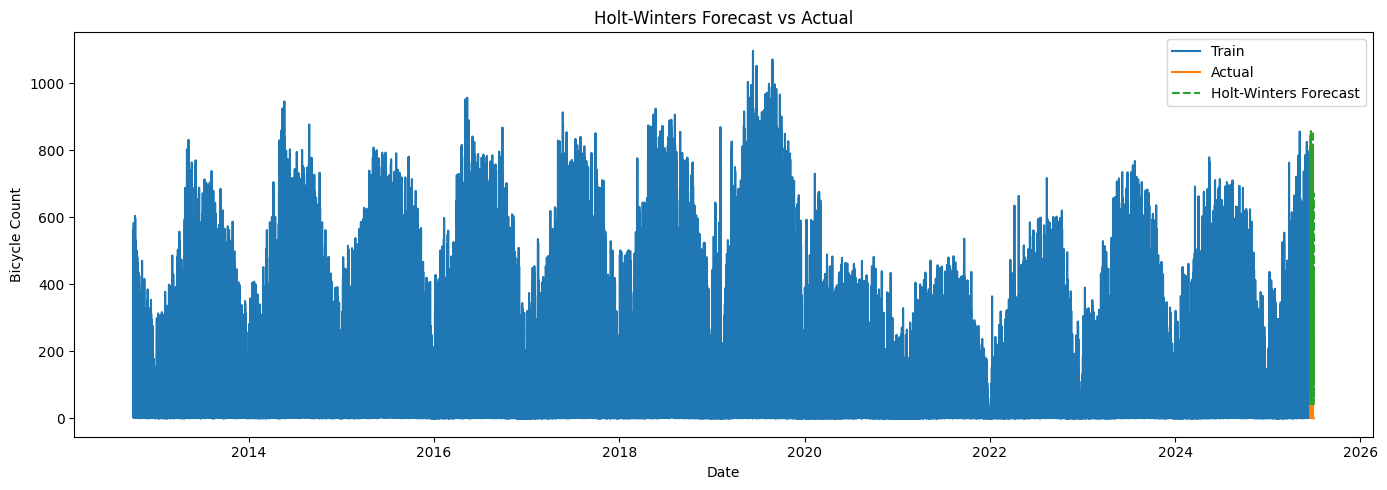

MAE: 154.35
RMSE: 188.28


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Step 1: Load Data
url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Step 2: Preprocess
df = df.resample('H').sum()
df = df.fillna(method='ffill')
df = df[['Fremont Bridge Sidewalks, south of N 34th St Total']].rename(
    columns={'Fremont Bridge Sidewalks, south of N 34th St Total': 'count'}
)

# Step 3: Split data into train/test
train = df[:-24*14]  # all except last 2 weeks
test = df[-24*14:]   # last 2 weeks

# Step 4: Fit Holt-Winters model
model = ExponentialSmoothing(
    train['count'],
    seasonal='add',
    seasonal_periods=24 * 7  # weekly seasonality
).fit()

# Step 5: Forecast
forecast = model.forecast(len(test))

# Step 6: Evaluate
mae = mean_absolute_error(test['count'], forecast)
rmse = sqrt(mean_squared_error(test['count'], forecast))

# Step 7: Plot results
plt.figure(figsize=(14, 5))
plt.plot(train.index, train['count'], label='Train')
plt.plot(test.index, test['count'], label='Actual')
plt.plot(test.index, forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Bicycle Count')
plt.legend()
plt.tight_layout()
plt.show()

# Step 8: Print metrics
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


QUESTION 2

Perform Unsupervised Clustering Analysis to Discover Patterns

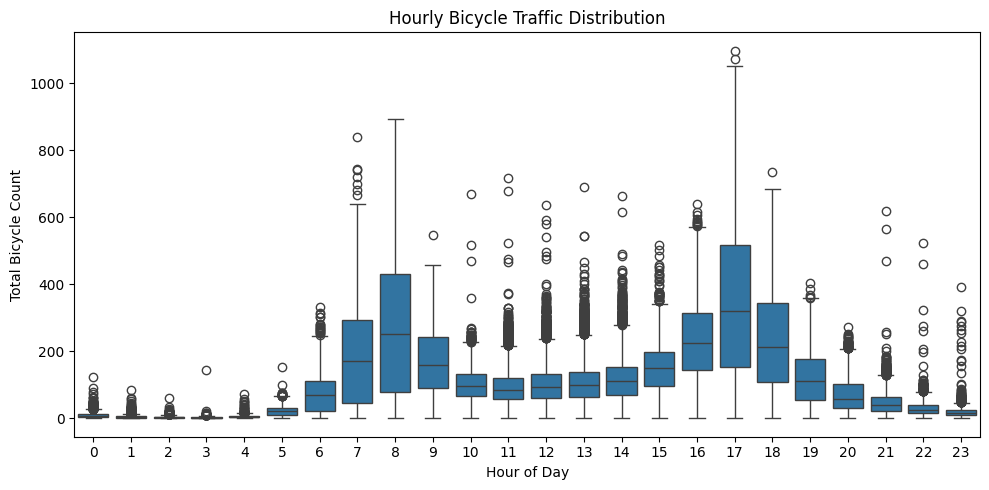

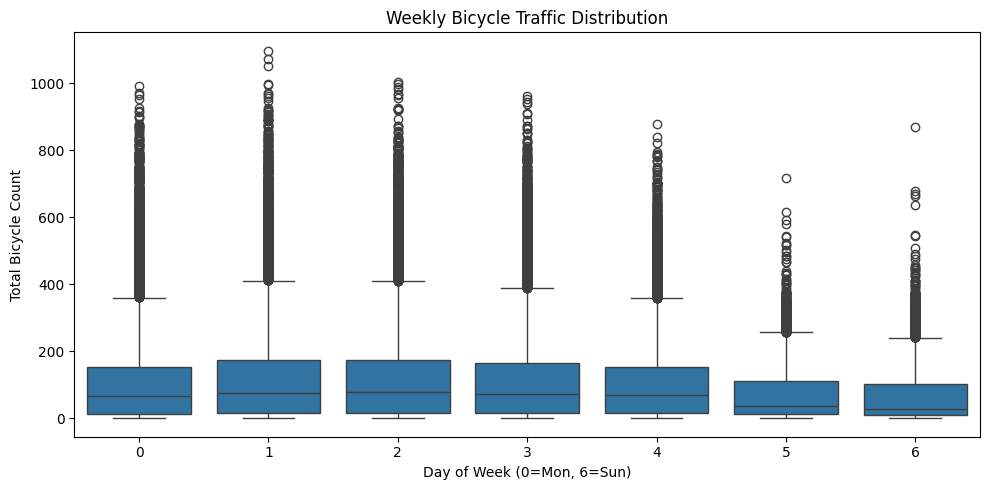

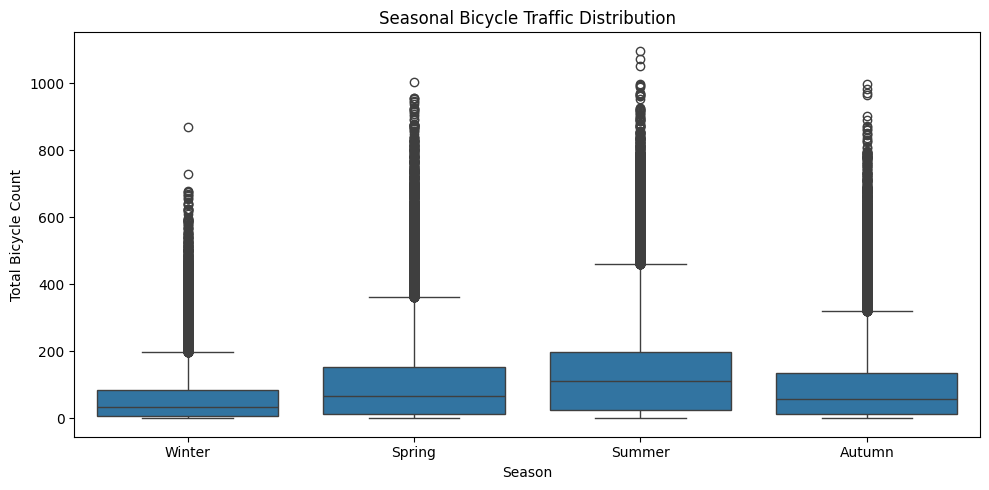

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url, parse_dates=['Date'])

# Set the datetime column as index
df.set_index('Date', inplace=True)

# Rename columns for simplicity
df.rename(columns={
    'Fremont Bridge Sidewalks, south of N 34th St Total': 'Total',
    'Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk': 'West',
    'Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk': 'East'
}, inplace=True)

# Drop rows with missing values
df = df.dropna()

# Feature engineering: extract time-based features
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek  # Monday = 0
df['Month'] = df.index.month

# Define season (simplified: Winter=12,1,2; Spring=3-5; Summer=6-8; Autumn=9-11)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)

# Visualize average traffic by hour
plt.figure(figsize=(10, 5))
sns.boxplot(x='Hour', y='Total', data=df)
plt.title('Hourly Bicycle Traffic Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Total Bicycle Count')
plt.tight_layout()
plt.show()

# Visualize average traffic by day of week
plt.figure(figsize=(10, 5))
sns.boxplot(x='DayOfWeek', y='Total', data=df)
plt.title('Weekly Bicycle Traffic Distribution')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Total Bicycle Count')
plt.tight_layout()
plt.show()

# Visualize traffic by season
plt.figure(figsize=(10, 5))
sns.boxplot(x='Season', y='Total', data=df, order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Seasonal Bicycle Traffic Distribution')
plt.xlabel('Season')
plt.ylabel('Total Bicycle Count')
plt.tight_layout()
plt.show()
